In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [130]:
# Reading Dataset
df = pd.read_csv('../../data/XAUUSD_2010-2023.csv').head(100_00)

In [85]:
# Dataset Overview
df.head(5)

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.0,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.3,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.1,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.6,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.6,1098.90,1098.90,67.50,1097.50


In [86]:
# number of rows and columns
df.shape

(100000, 7)

In [87]:
# getting some basic informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    100000 non-null  object 
 1   open    100000 non-null  float64
 2   high    100000 non-null  float64
 3   low     100000 non-null  float64
 4   close   100000 non-null  float64
 5   rsi14   100000 non-null  float64
 6   sma14   100000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 5.3+ MB


In [88]:
# checking the number of missing values
df.isnull().sum()

time     0
open     0
high     0
low      0
close    0
rsi14    0
sma14    0
dtype: int64

In [89]:
# getting the statistical measures of the data
df.describe()

,open,high,low,close,rsi14,sma14
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1282.214728,1282.679546,1281.746151,1282.218261,50.929789,1282.191062
std,126.523868,126.553800,126.493120,126.524619,11.197596,126.514056
min,1048.580000,1050.450000,1044.180000,1048.530000,7.080000,1050.850000
25%,1176.630000,1177.080000,1176.117500,1176.630000,43.660000,1176.775000
50%,1256.940000,1257.300000,1256.580000,1256.940000,51.040000,1256.950000
75%,1385.350000,1385.780000,1384.930000,1385.350000,58.370000,1385.350000
max,1574.300000,1576.300000,1573.700000,1574.450000,91.980000,1568.560000


In [90]:
# Checking Duplicates
df.duplicated().sum()

0

In [91]:
# Checking Missing Values
df.isnull().sum().sum()

0

In [92]:
# Preprocess the data
df = df.dropna()  # Handle missing values

In [131]:
df_cp = df.copy()
df = df.drop(columns=['rsi14', 'sma14', 'time'], axis=1)

In [132]:
correlation = df.corr()

<Axes: >

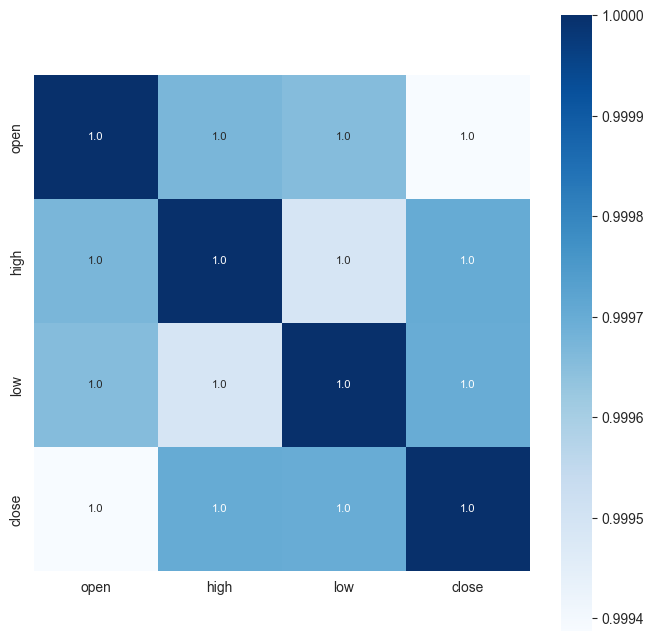

In [133]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize=(8, 8))
sns.heatmap(
    correlation,
    cbar=True,
    square=True,
    fmt='.1f',
    annot=True,
    annot_kws={'size': 8},
    cmap='Blues'
)

In [134]:
# correlation values of GLD
print(correlation['close'])

open     0.999387
high     0.999701
low      0.999699
close    1.000000
Name: close, dtype: float64


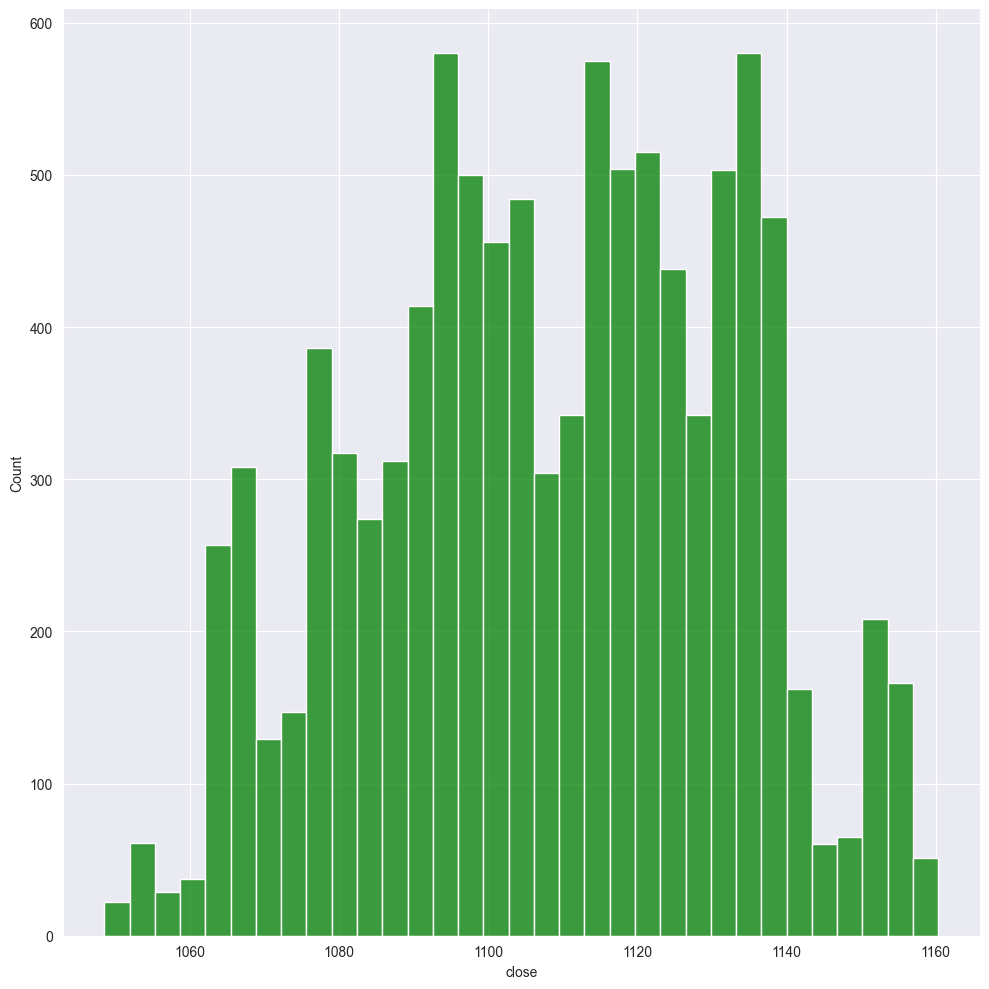

In [135]:
# checking the distribution of the GLD Price
sns.displot(
    df['close'],
    color='green',
    height=10,
)

In [136]:
X = df.drop(['close'], axis=1)
Y = df['close']

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [138]:
regressor = RandomForestRegressor(n_estimators=100)

In [139]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [140]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [141]:
print(test_data_prediction)

[1078.6558 1134.4625 1129.709  ... 1083.9038 1088.9313 1134.2577]


In [142]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9996535299659988


In [143]:
Y_test = list(Y_test)
len(Y_test)

2000

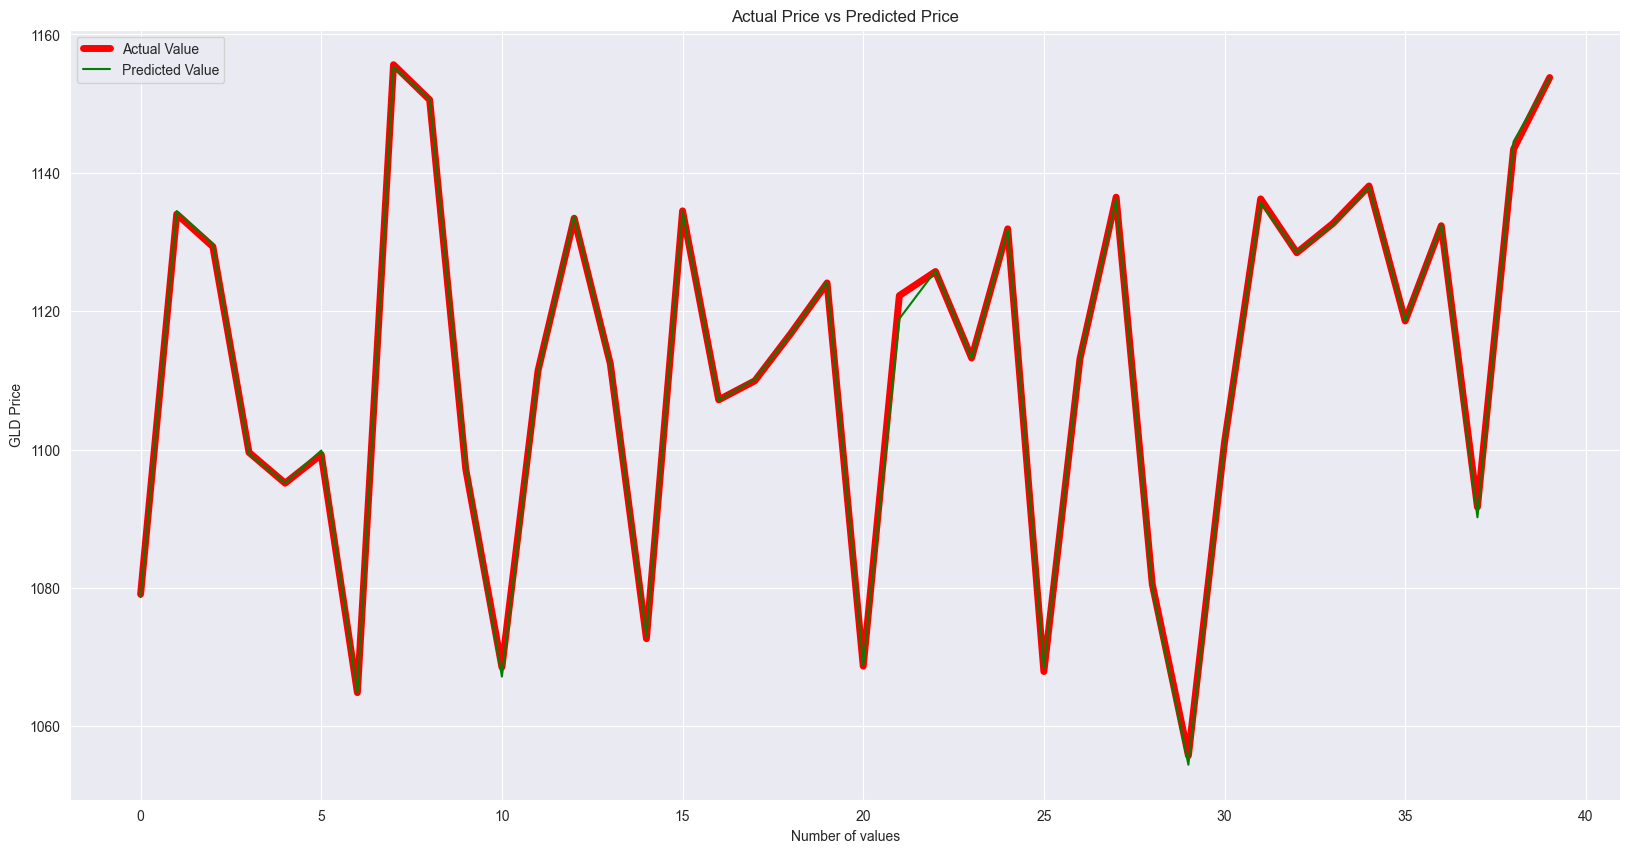

In [147]:
plt.figure(
    figsize=(
        20,  #panjang
        10  # lebar
    ))
plt.plot(
    Y_test[:40],
    color='red',
    label='Actual Value',
    lw=5,
)

plt.plot(
    test_data_prediction[:40],
    color='green',
    label='Predicted Value'
)

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

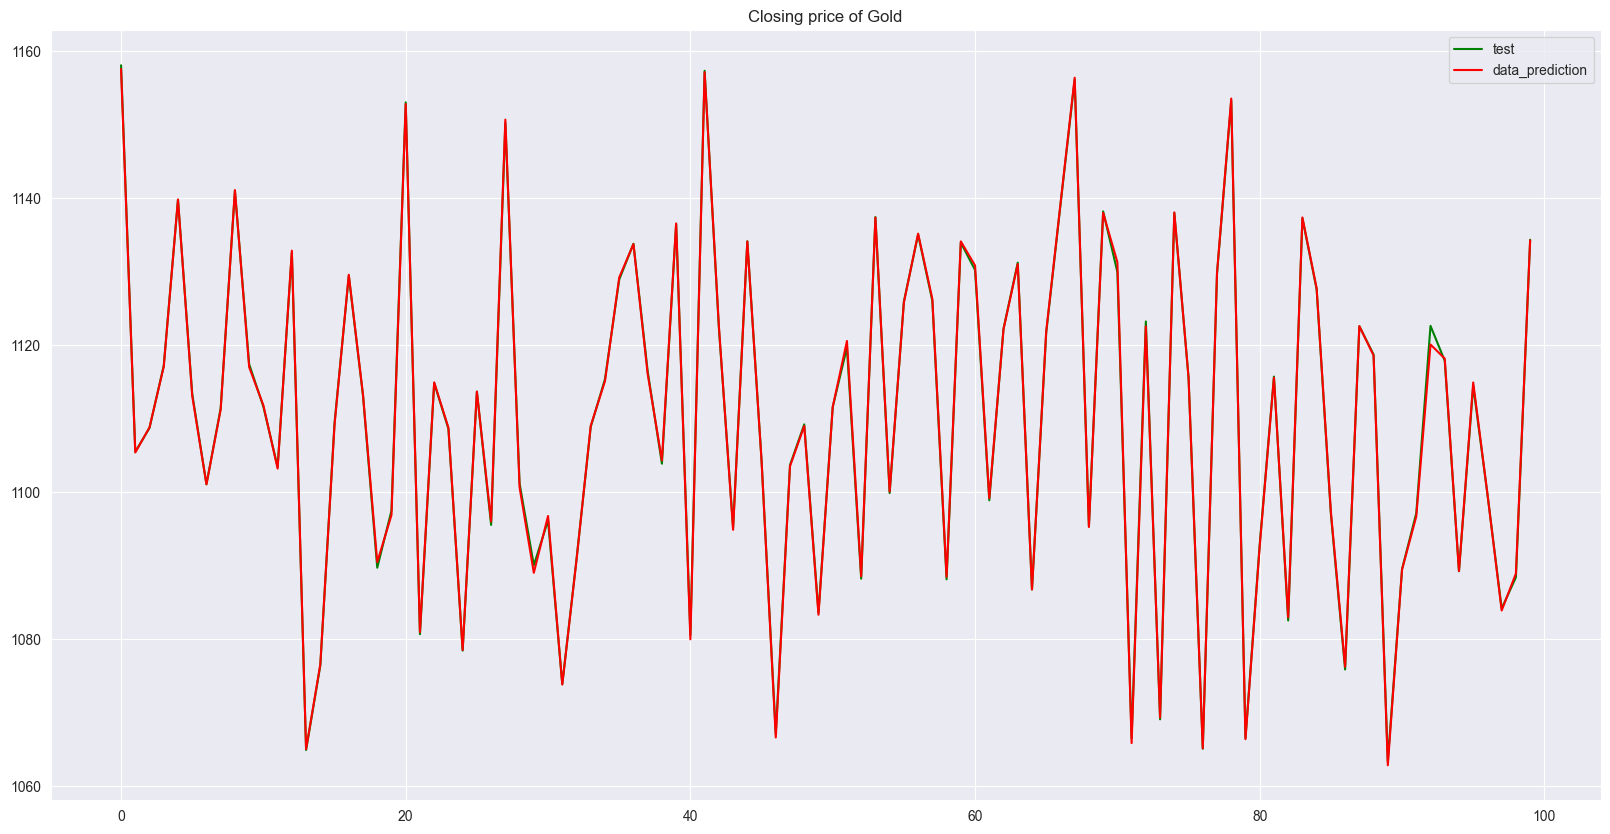

In [151]:
plt.figure(
    figsize=(
        20,  #panjang
        10  # lebar
    ))
 
sns.lineplot(
    Y_test[1900:2000],
    label='test',
    color='green')
sns.lineplot(

    test_data_prediction[1900:2000],
    label='data_prediction', color='red')
plt.title('Closing price of Gold')
plt.show()
